## Hotel Rating Prediction

Given *TripAdvisor hotel reviews, let's try to predict the **rating** associated with a given review.

We will use a TensorFlow RNN to make our predictions.

Data source: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

### Importing Libraries

In [11]:
import numpy as np
import pandas as pd

import re
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

import tensorflow as tf

import warnings
warnings.filterwarnings(action='ignore')

In [12]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv', nrows=1000)
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
995,average price hotel good location 1.5 blocks u...,3
996,good customer service recently wrote dissatisf...,4
997,ignore bad press just post review reading nega...,4
998,"business trip ok hotel fine evening business, ...",3


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Rating  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Processing Text

In [14]:
stop_words = stopwords.words('english')

In [15]:
def process_text(text):
    text = re.sub(r'\d+', ' ', text)
    text = text.split()
    text = " ".join([word for word in text if word.lower().strip() not in stop_words])
    return text

In [16]:
reviews = data['Review'].apply(process_text)

In [17]:
reviews

0      nice hotel expensive parking got good deal sta...
1      ok nothing special charge diamond member hilto...
2      nice rooms * experience hotel monaco seattle g...
3      unique, great stay, wonderful time hotel monac...
4      great stay great stay, went seahawk game aweso...
                             ...                        
995    average price hotel good location . blocks uni...
996    good customer service recently wrote dissatisf...
997    ignore bad press post review reading negative ...
998    business trip ok hotel fine evening business, ...
999    okay downstairs medicore room overrated overpr...
Name: Review, Length: 1000, dtype: object

In [18]:
num_words = 1000

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(reviews)

sequences = tokenizer.texts_to_sequences(reviews)

In [19]:
sequences

[[9,
  1,
  202,
  26,
  35,
  10,
  165,
  4,
  1,
  987,
  106,
  212,
  154,
  116,
  422,
  78,
  143,
  26,
  43,
  278,
  113,
  30,
  291,
  319,
  45,
  2,
  2,
  17,
  9,
  163,
  21,
  28,
  157,
  221,
  16,
  347,
  541,
  2,
  11,
  60,
  354,
  355,
  883,
  225,
  57,
  731,
  884,
  390,
  203,
  325,
  801,
  9,
  4,
  9,
  377,
  599,
  937,
  93,
  988,
  8,
  3,
  51,
  114,
  101,
  89,
  9,
  54,
  140,
  26,
  11],
 [265,
  167,
  304,
  219,
  576,
  261,
  237,
  446,
  86,
  987,
  15,
  542,
  71,
  111,
  196,
  197,
  249,
  330,
  111,
  503,
  25,
  285,
  1,
  2,
  116,
  161,
  18,
  696,
  127,
  144,
  16,
  112,
  885,
  18,
  305,
  81,
  617,
  399,
  618,
  249,
  36,
  27,
  35,
  492,
  2,
  25,
  503,
  618,
  833,
  111,
  22,
  4,
  366,
  618,
  269,
  249,
  638,
  543,
  111,
  249,
  161,
  348,
  161,
  249,
  18,
  180,
  638,
  72,
  269,
  638,
  577,
  504,
  269,
  23,
  6,
  37,
  85,
  18,
  10,
  27,
  762,
  81,
  34,
  62,
  27

In [20]:
max_seq_length = np.max(list((map(lambda x: len(x), sequences))))
max_seq_length

374

In [21]:
inputs = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [22]:
inputs

array([[  9,   1, 202, ...,   0,   0,   0],
       [265, 167, 304, ...,   0,   0,   0],
       [  9,   7,  54, ...,   0,   0,   0],
       ...,
       [ 98, 597, 660, ...,   0,   0,   0],
       [ 73,  72, 265, ...,   0,   0,   0],
       [496, 529,   2, ...,   0,   0,   0]], dtype=int32)

In [23]:
inputs.shape

(1000, 374)

### Encoding Labels

In [24]:
data['Rating'].value_counts()

Rating
5    334
4    311
3    137
1    110
2    108
Name: count, dtype: int64

In [25]:
labels = np.array(data['Rating'].apply(lambda x: 1 if x==5 else 0))
labels

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

#### Split the data

In [26]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(inputs, labels, train_size=0.7, random_state=100)

### Modeling/Training

2025-06-01 18:05:04.010512: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2025-06-01 18:05:04.376979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-06-01 18:05:04.380040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-06-01 18:05:04.3

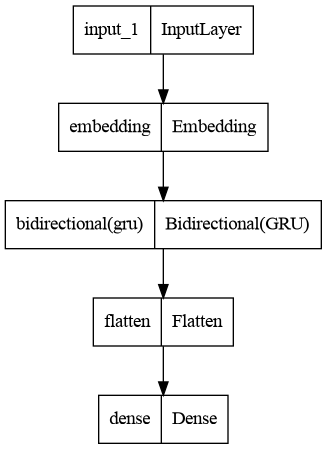

In [27]:
embedding_dim = 128

inputs = tf.keras.Input(shape=(max_seq_length, ))

embedding = tf.keras.layers.Embedding(
    input_dim = num_words,
    output_dim = embedding_dim,
    input_length = max_seq_length
)(inputs)

gru = tf.keras.layers.Bidirectional(
    tf.keras.layers.GRU(128, return_sequences=True))(embedding)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)

model = tf.keras.Model(inputs, outputs)

tf.keras.utils.plot_model(model)

In [28]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    train_inputs,
    train_labels,
    validation_split=0.2,
    batch_size=32,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20


2025-06-01 18:05:09.860761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-06-01 18:05:09.863058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-06-01 18:05:09.864615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

18/18 [==============================] - ETA: 0s - loss: 0.6698 - accuracy: 0.6304 - auc: 0.5139  

2025-06-01 18:05:29.676903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-06-01 18:05:29.678807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-06-01 18:05:29.680212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

18/18 [==============================] - 23s 1s/step - loss: 0.6698 - accuracy: 0.6304 - auc: 0.5139 - val_loss: 0.6633 - val_accuracy: 0.6929 - val_auc: 0.6735
Epoch 2/20
18/18 [==============================] - 15s 815ms/step - loss: 0.5924 - accuracy: 0.6982 - auc: 0.7458 - val_loss: 0.5758 - val_accuracy: 0.6714 - val_auc: 0.7687
Epoch 3/20
18/18 [==============================] - 15s 842ms/step - loss: 0.3451 - accuracy: 0.8661 - auc: 0.9299 - val_loss: 1.0742 - val_accuracy: 0.6571 - val_auc: 0.7606


### Results

In [29]:
model.evaluate(test_inputs, test_labels)

10/10 [==============================] - 2s 219ms/step - loss: 0.6596 - accuracy: 0.7167 - auc: 0.6347


[0.6595652103424072, 0.7166666388511658, 0.6346983313560486]